### Data Analysis and Visualization

In this section, we perform data analysis and create visualizations to understand the fuel consumption patterns for the Toyota Avensis T22. The analysis is based on the cleaned data from the previous step.


### Car Specifications:
The Toyota Avensis T22 used for this analysis has the following technical specifications:
- Engine Type: 2.0L, inline 4, turbo charged
- Power: 110 horsepower
- Curb Weight: 1410 kg
- Fuel Type: Diesel

#### 1. **Data Preparation**:
   - The data is loaded from the `car_refueling_data.csv` file.
   - We convert the `Date` column to a proper datetime format.
   - The fuel consumption in liters per 100 kilometers
   -  We calculate the average fuel consumption (`Fuel consumption (L/100km)`) across the entire dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('car_refueling_data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df['Fuel consumption (L/100km)'] = (df['Liters'] / df['Kilometers Traveled']) * 100

average_fuel_consumption = df['Fuel consumption (L/100km)'].mean()

#### 2. **Visualizing Fuel Consumption Over Time**:
   - We plot the fuel consumption over time (`Date`) as a line graph to see how fuel consumption has changed over time.
   - A horizontal red dashed line represents the **average fuel consumption** across the dataset.
   
   This plot helps in identifying trends or variations in fuel consumption over time.

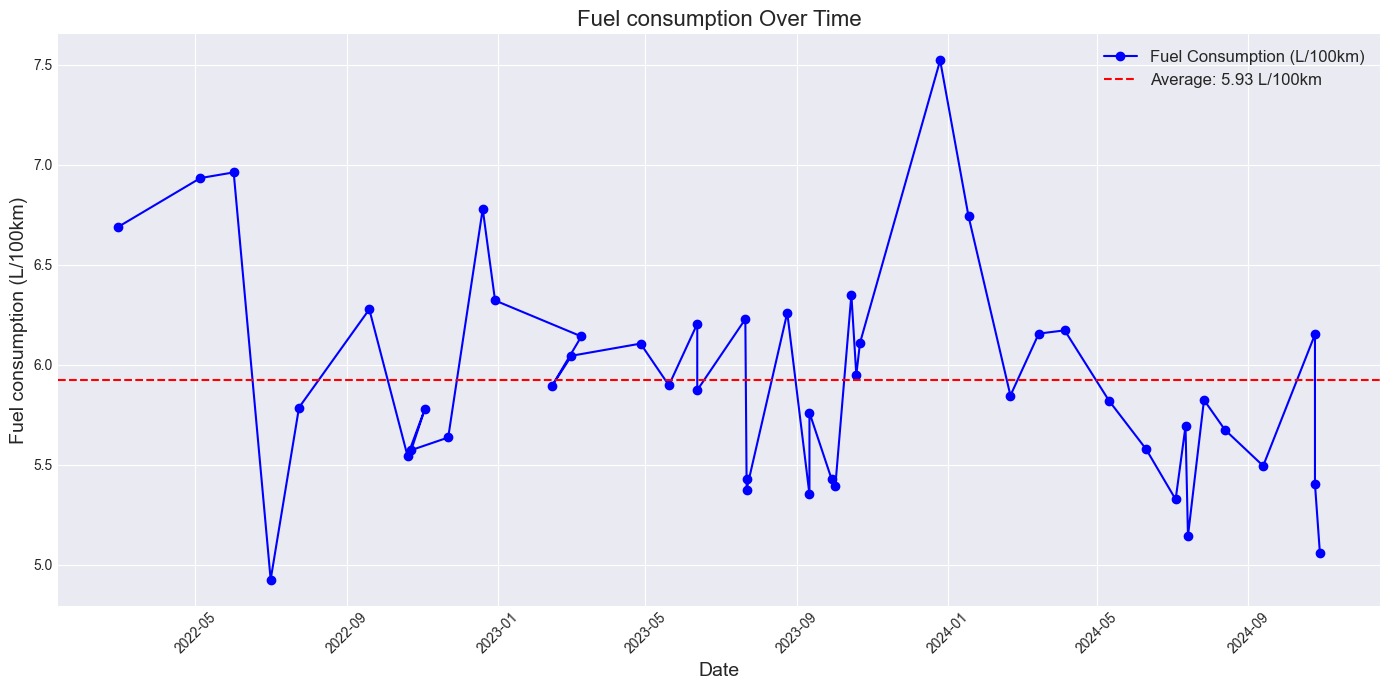

In [2]:
# seaborn-v0_8-darkgrid
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Fuel consumption (L/100km)'], marker='o', label='Fuel Consumption (L/100km)', color='b')
plt.axhline(y=average_fuel_consumption, color='r', linestyle='--', label=f'Average: {average_fuel_consumption:.2f} L/100km')
plt.title("Fuel consumption Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Fuel consumption (L/100km)", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### 3. **Visualizing the Relationship Between Kilometers Traveled and Liters Consumed**:
   - A scatter plot is created to visualize the relationship between **kilometers traveled** and **liters of fuel consumed**.
   - A trend line (red dashed line) is fitted using polynomial regression, which helps in understanding the general relationship between the two variables.

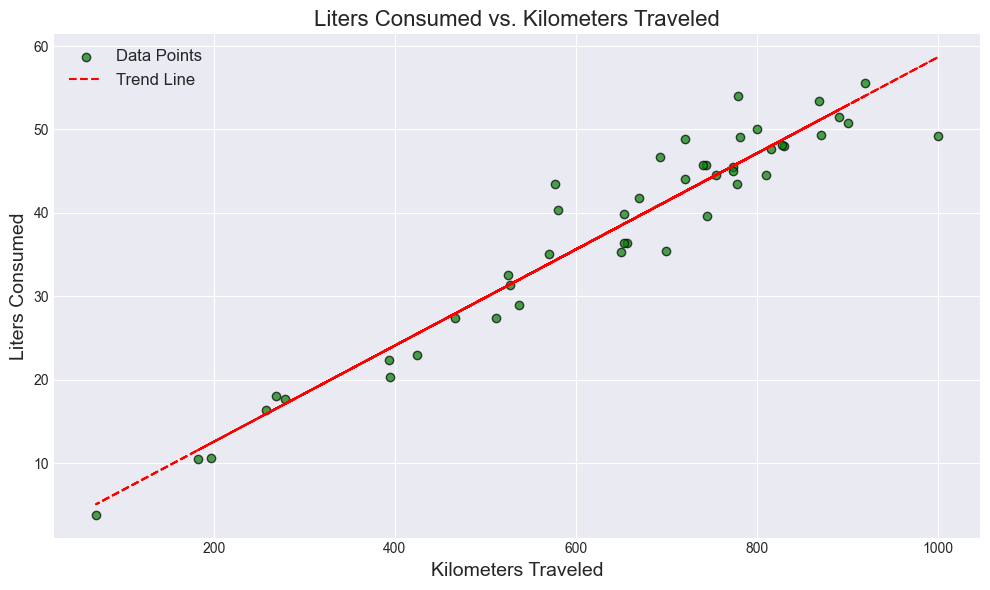

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Kilometers Traveled'], df['Liters'], alpha=0.7, c='g', edgecolors='k', label='Data Points')

z = np.polyfit(df['Kilometers Traveled'], df['Liters'], 1)
p = np.poly1d(z)
plt.plot(df['Kilometers Traveled'], p(df['Kilometers Traveled']), "r--", label='Trend Line')

plt.title("Liters Consumed vs. Kilometers Traveled", fontsize=16)
plt.xlabel("Kilometers Traveled", fontsize=14)
plt.ylabel("Liters Consumed", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
